In [12]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [13]:
# Step 1: Data Collection
# Load the dataset
df = pd.read_csv("car data.csv")

# Display the first few rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
# Step 2: Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check column names and clean them (remove spaces, convert to lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns in the dataset:", df.columns)

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Columns in the dataset: Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')


In [15]:
# Step 3: Feature Engineering
# Verify if 'car_name' column exists
if 'car_name' not in df.columns:
    raise KeyError("Column 'car_name' not found in the dataset.")

# Drop the 'car_name' column (not useful for prediction)
df.drop('car_name', axis=1, inplace=True)

# Verify if 'year' column exists
if 'year' not in df.columns:
    raise KeyError("Column 'year' not found in the dataset.")

# Create a new feature: Age of the Car
df['age'] = 2023 - df['year']

# Drop the 'year' column as it's now redundant
df.drop('year', axis=1, inplace=True)


In [16]:
# Step 4: Handle Categorical Variables (One-Hot Encoding)
# Verify required categorical columns
required_columns = ['fuel_type', 'seller_type', 'transmission']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"Missing columns in dataset: {missing_columns}")

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fuel_type', 'seller_type', 'transmission'], drop_first=True)

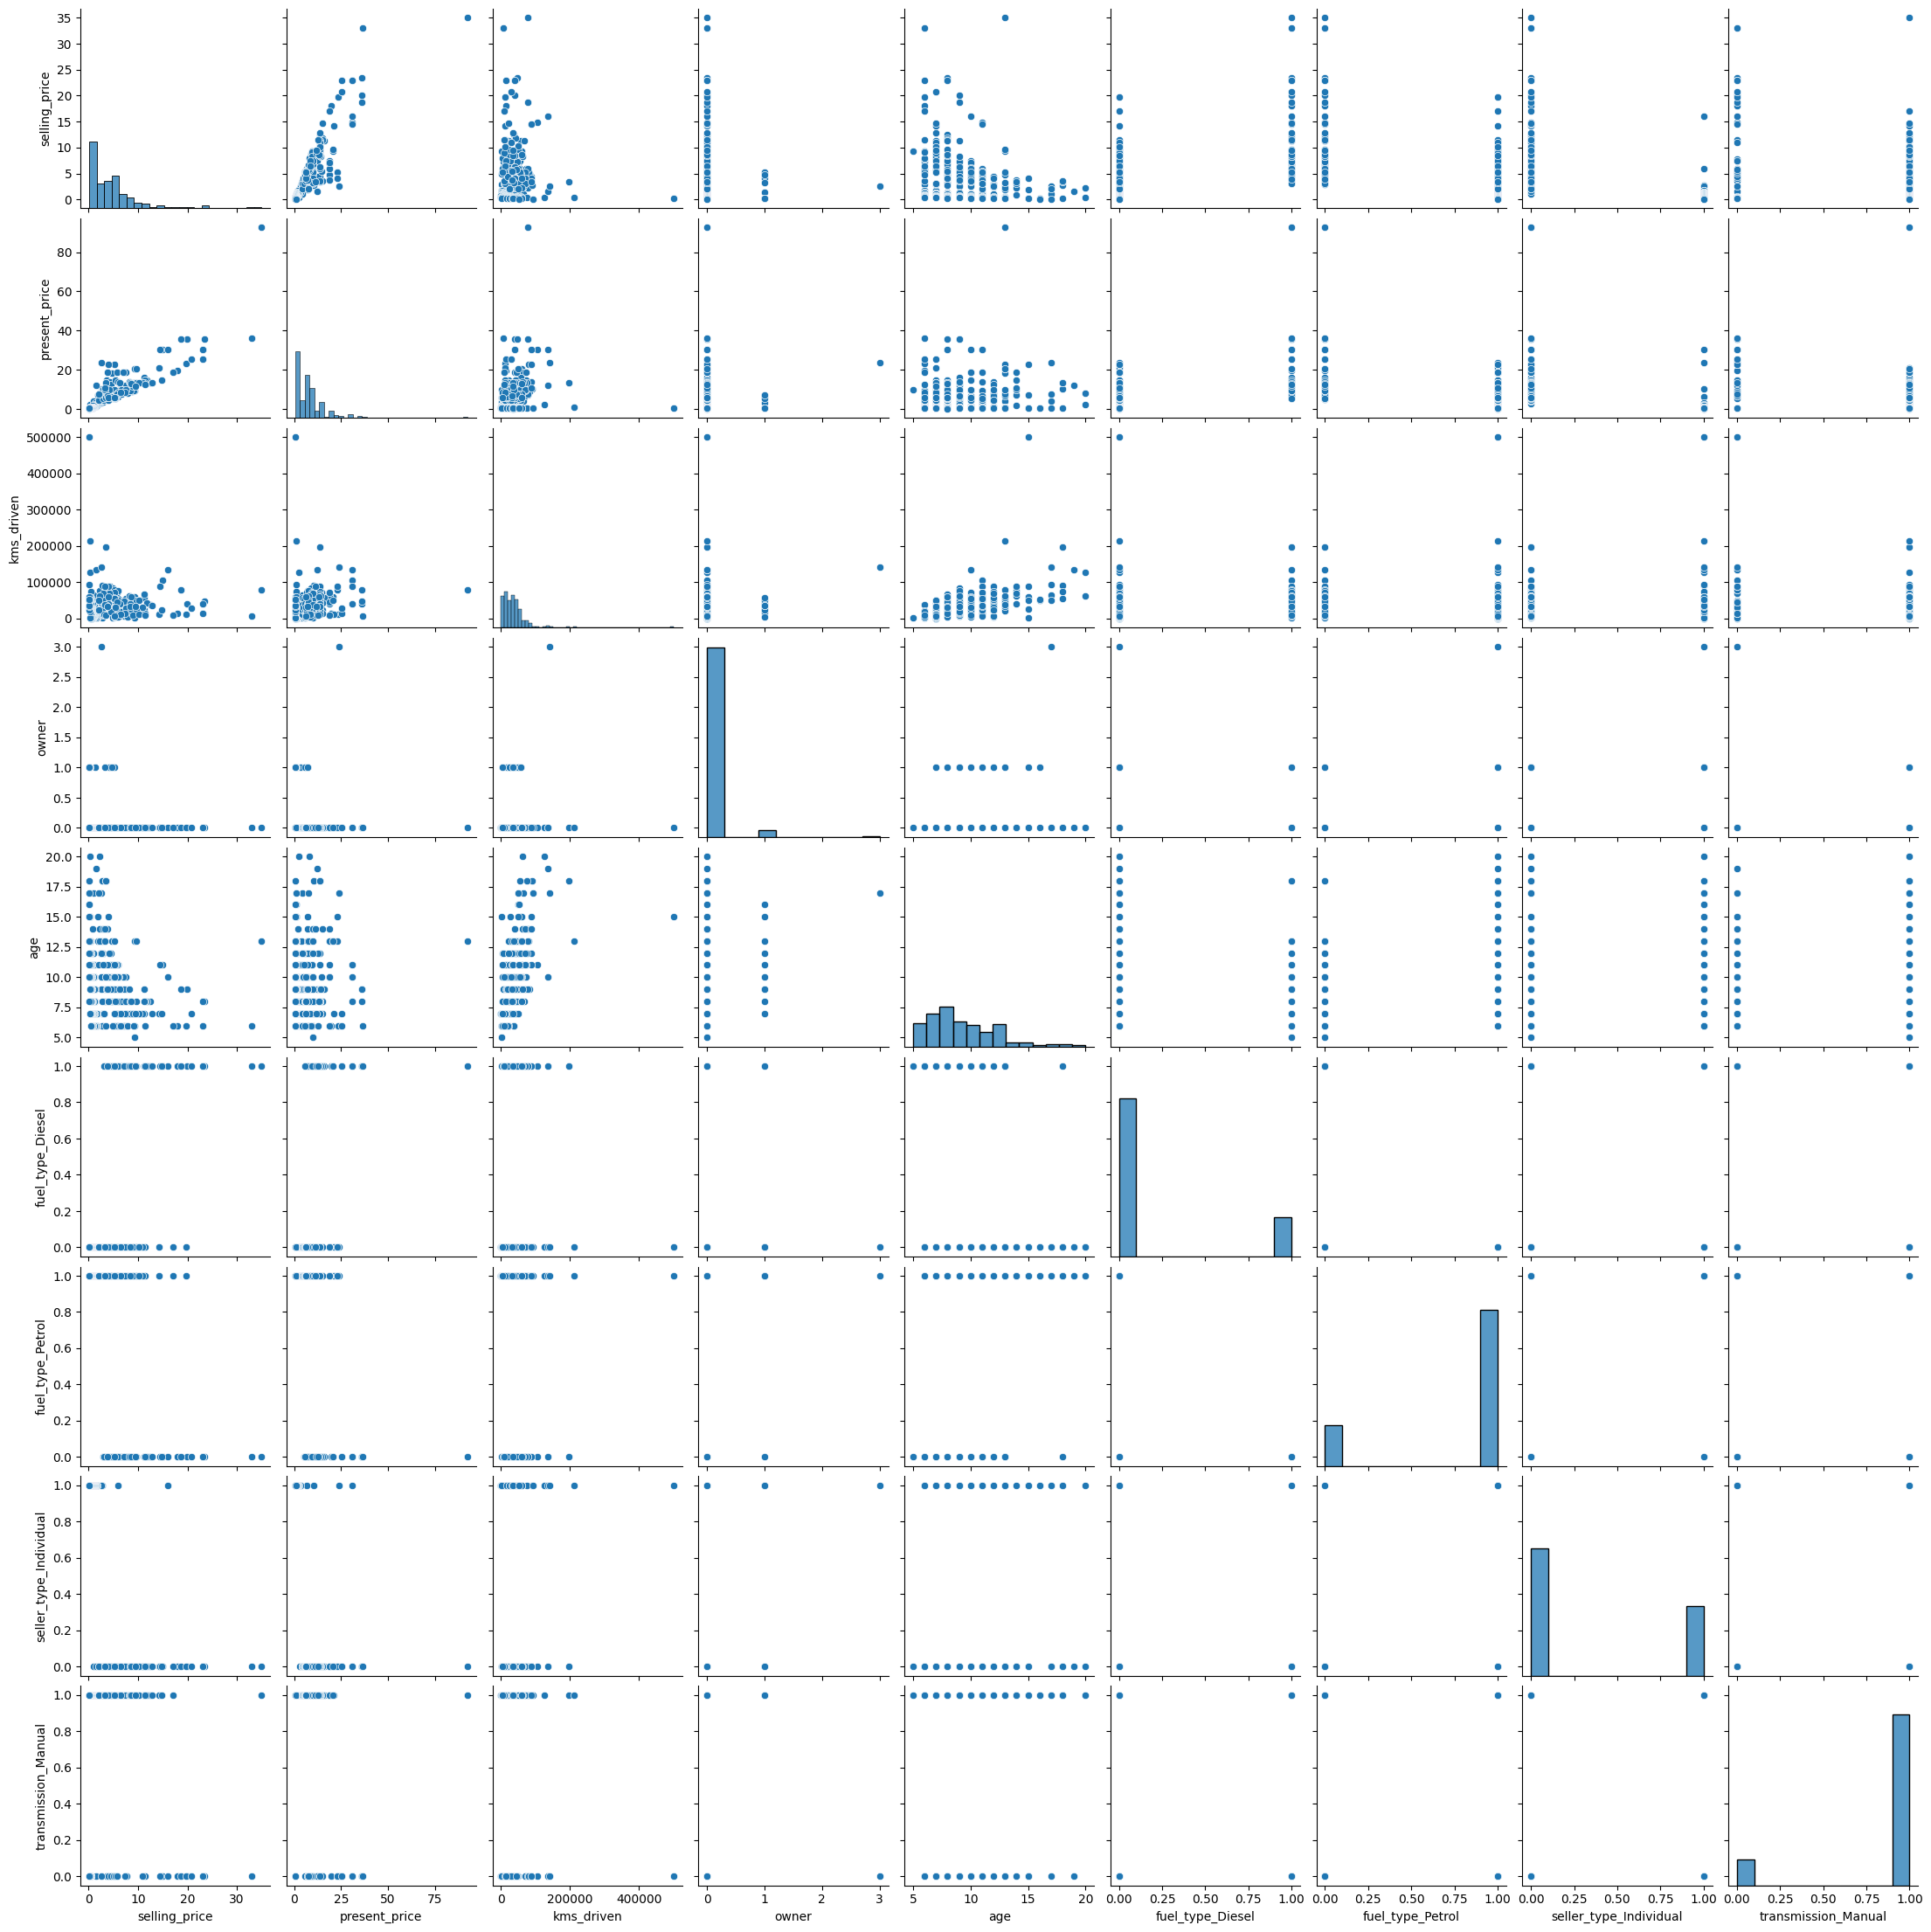

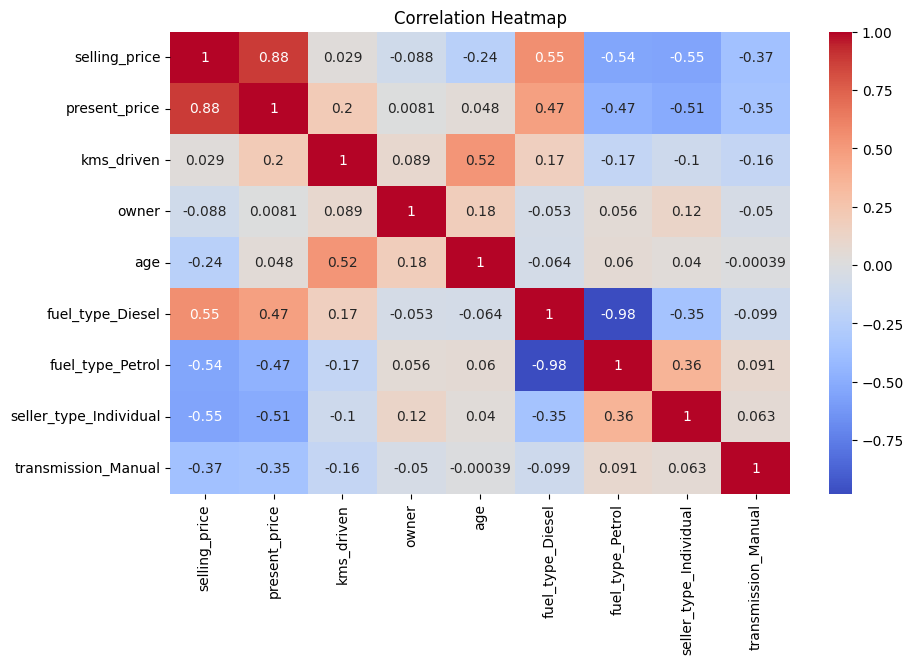

In [17]:
# Step 5: Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Step 6: Model Selection and Training
# Split into features (X) and target (y)
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Linear Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Linear Regression Results:
RMSE: 1.865155213551374
R2 Score: 0.8489813024899079


In [19]:
# Step 7: Model Improvement
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)
print("\nPolynomial Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}")
print(f"R2 Score: {r2_score(y_test, y_pred_poly)}")

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print("\nRidge Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
print("\nLasso Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")



Polynomial Regression Results:
RMSE: 0.810661229813789
R2 Score: 0.9714714584757181

Ridge Regression Results:
RMSE: 1.8680796918120495
R2 Score: 0.8485073503610564

Lasso Regression Results:
RMSE: 2.703825362354936
R2 Score: 0.6826357245819223


In [20]:
# Step 8: Interpretation of Results
# Ridge Regression Coefficients
ridge_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
})
print("\nRidge Regression Coefficients:")
print(ridge_coeffs.sort_values(by='Coefficient', ascending=False))

# Lasso Regression Coefficients
lasso_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})
print("\nLasso Regression Coefficients:")
print(lasso_coeffs.sort_values(by='Coefficient', ascending=False))



Ridge Regression Coefficients:
                  Feature  Coefficient
0           present_price     3.826928
4        fuel_type_Diesel     0.910386
5        fuel_type_Petrol     0.206792
2                   owner    -0.241780
1              kms_driven    -0.257073
7     transmission_Manual    -0.547325
6  seller_type_Individual    -0.576843
3                     age    -1.013542

Lasso Regression Coefficients:
                  Feature  Coefficient
0           present_price     3.502344
4        fuel_type_Diesel     0.105428
2                   owner    -0.000000
1              kms_driven    -0.000000
7     transmission_Manual    -0.000000
5        fuel_type_Petrol    -0.000000
6  seller_type_Individual    -0.056696
3                     age    -0.245941


In [21]:
# Step 9: Model Deployment
# Save the Ridge model
joblib.dump(ridge_model, 'ridge_model.pkl')

# Load the model
loaded_model = joblib.load('ridge_model.pkl')

In [22]:
# Example: Predict on new data
new_data = pd.DataFrame({
    'present_price': [10.5],
    'kms_driven': [50000],
    'owner': [0],
    'age': [5],
    'fuel_type_Diesel': [1],  # Match the column name in X.columns
    'fuel_type_Petrol': [0],  # Match the column name in X.columns
    'seller_type_Individual': [0],  # Match the column name in X.columns
    'transmission_Manual': [1]  # Match the column name in X.columns
})

# Ensure the columns match the training data
new_data = new_data[X.columns]

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict using the loaded model
predicted_price = loaded_model.predict(new_data_scaled)
print(f"\nPredicted Selling Price: {predicted_price[0]}")


Predicted Selling Price: 9.109105345882938


Best alpha for Ridge Regression: {'alpha': 10}
Cross-Validation R2 Scores: [0.85631013 0.8577625  0.81189042 0.8328529  0.90166089]
Mean Cross-Validation R2 Score: 0.8520953691323685


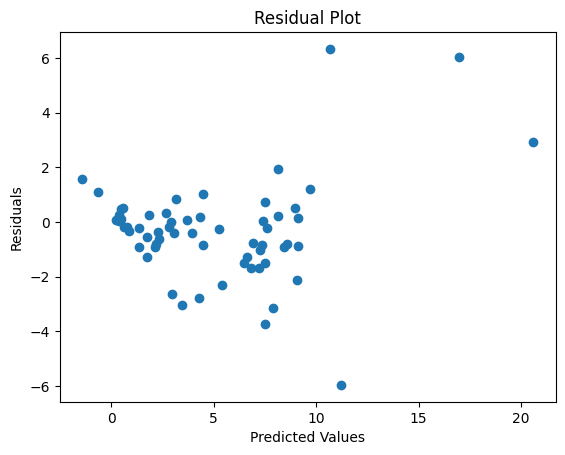

In [23]:
# Advanced Feature Engineering: Interaction Terms
df['age_kms_interaction'] = df['age'] * df['kms_driven']

# Handling Outliers: Cap 'kms_driven' at the 99th percentile
kms_driven_cap = df['kms_driven'].quantile(0.99)
df['kms_driven'] = np.where(df['kms_driven'] > kms_driven_cap, kms_driven_cap, df['kms_driven'])

# Hyperparameter Tuning: Grid Search for Ridge Regression
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best alpha for Ridge Regression:", grid_search.best_params_)

# Cross-Validation: k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", np.mean(cv_scores))

# Residual Analysis: Plot Residuals
residuals = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# LIME for Model Interpretability
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['Selling_Price'],
    mode='regression'
)

# Explain a single prediction
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test_scaled[i], ridge_model.predict, num_features=5)

# Visualize the explanation
exp.show_in_notebook()